# aim 
Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

# supervised Ml problem 
we have data with input and label 

# classification problem 

# source of data : From company

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
# from data we can see that CustomerID , Name dosn't affect our data so we going to drop them 
df.drop(columns=['CustomerID' , 'Name'] , inplace= True)

In [5]:
df.sample(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
50572,39,Male,Los Angeles,7,58.23,382,1
65284,33,Male,Los Angeles,5,88.47,423,1
97889,63,Male,New York,14,80.45,331,0
79719,25,Female,Chicago,9,46.30,413,1
18183,33,Male,Miami,10,60.54,450,0


In [6]:
print('number of rows : ' , df.shape[0])
print('number of rows : ' , df.shape[1])

number of rows :  100000
number of rows :  7


In [13]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


no null value and data type also right

In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [16]:
df.duplicated().any()

False

# EDA

In [17]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<AxesSubplot: xlabel='Location', ylabel='count'>

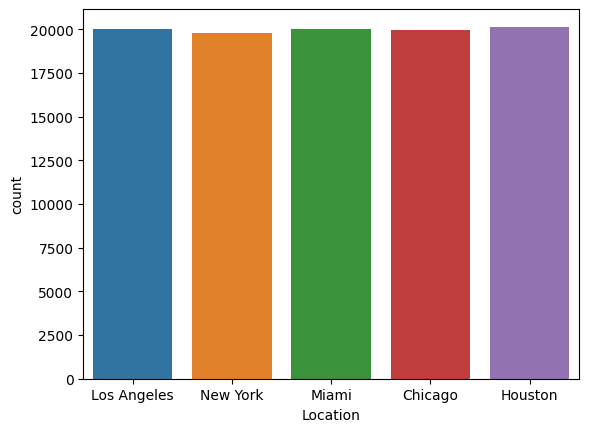

In [19]:
sns.countplot(x = 'Location' , data = df)

so their are 5 location and the number of data in each location is equal 

<AxesSubplot: xlabel='Gender', ylabel='count'>

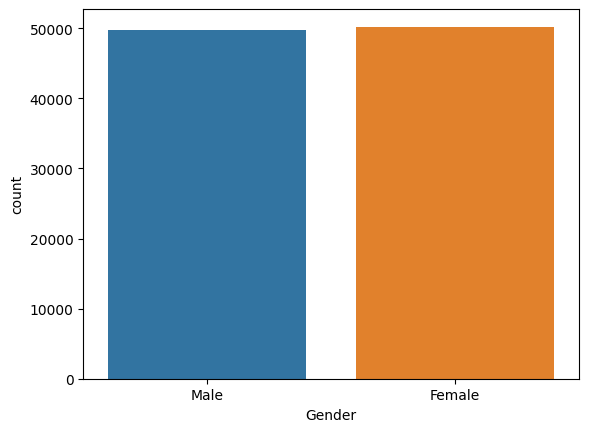

In [20]:
sns.countplot(data= df , x = 'Gender')

again both male and female are of same number 

In [21]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

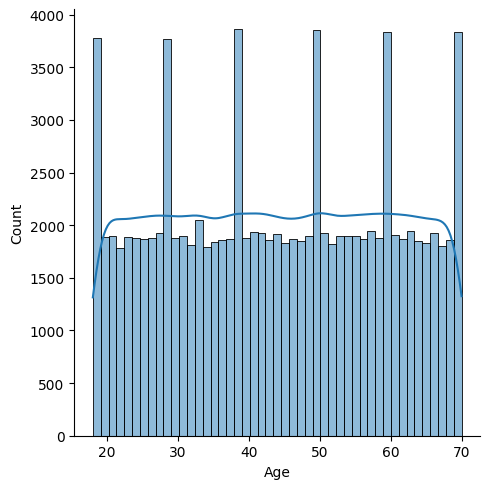

In [22]:
sns.displot(data=df  , x = 'Age' , kde = True)

data is mostly uniformly distributated but at some range the count is high

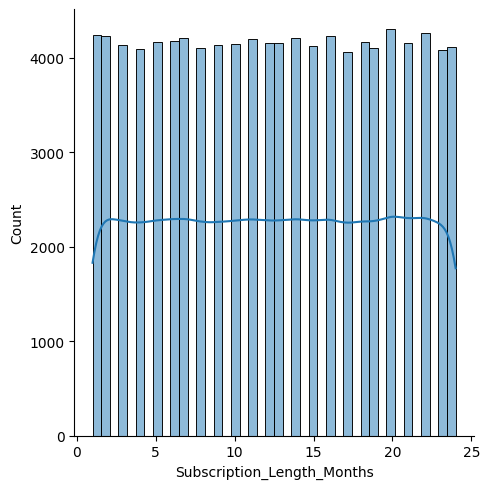

In [23]:
sns.displot(data = df , x = 'Subscription_Length_Months' , kde = True)

Subscription_Length_Months is a discrete value

In [24]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

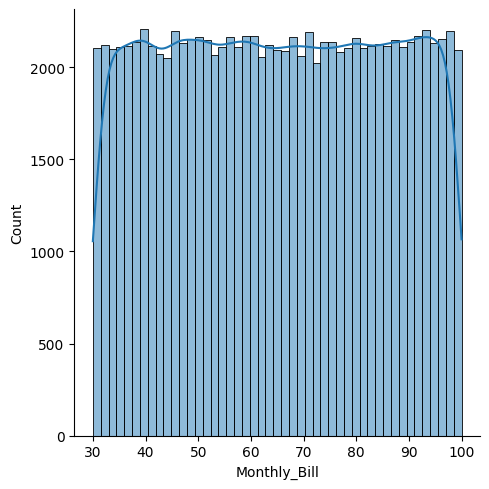

In [25]:
sns.displot(data = df , x = 'Monthly_Bill' , kde = True)

it is also uniform 

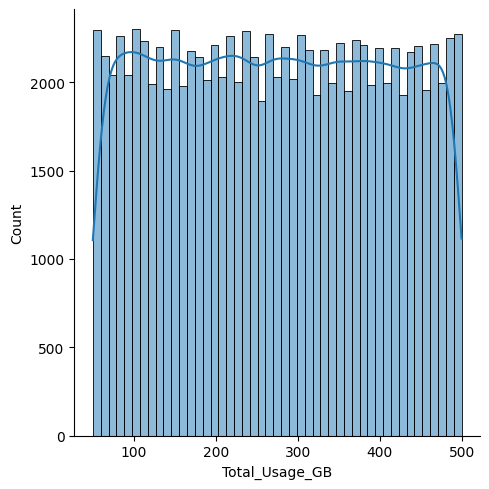

In [26]:
sns.displot(data = df , x = 'Total_Usage_GB' , kde = True)

<AxesSubplot: xlabel='Churn', ylabel='count'>

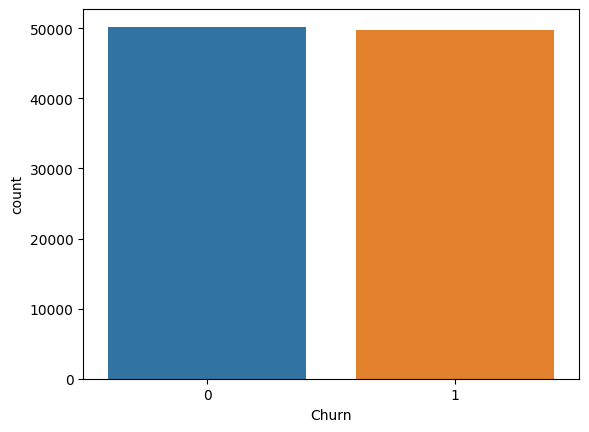

In [27]:
sns.countplot(data= df , x = 'Churn')

both data is equal which is good 

In [28]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

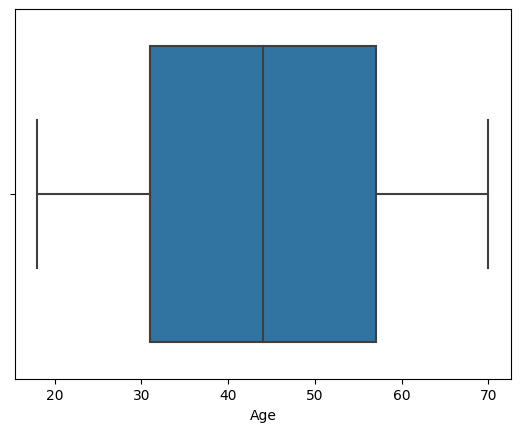

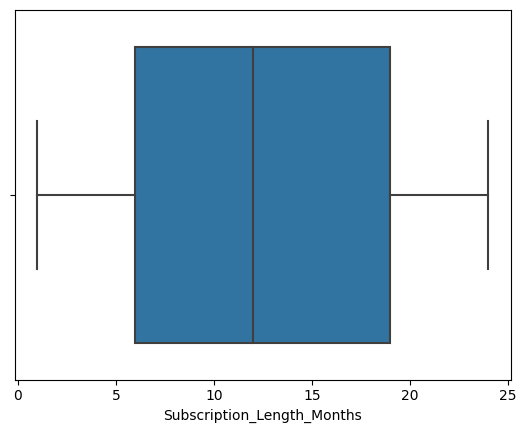

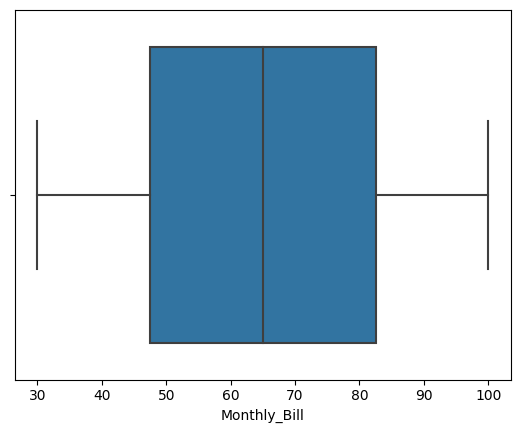

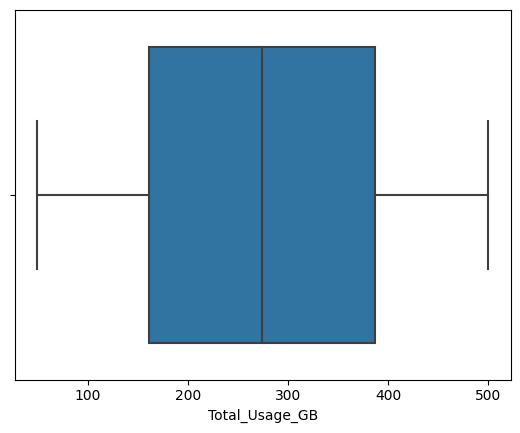

In [29]:
k = ['Age' , 'Subscription_Length_Months' , 'Monthly_Bill' , 'Total_Usage_GB']
for i in k : 
    sns.boxplot(x=i , data=df)
    plt.show()

no outliers 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
x = df.drop(columns= ['Churn' , 'Total_Usage_GB'] )
y = df['Churn']
x_train , x_test , y_train , y_test =  train_test_split(x , y , test_size= 0.2 ,random_state=42)

In [43]:
print(x_train.shape)


(80000, 5)


In [44]:
x_train.sample(5)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill
40461,36,Male,New York,2,58.54
96363,63,Male,Chicago,17,53.71
30924,65,Female,New York,20,74.88
21375,50,Female,Houston,4,82.16
66040,44,Male,New York,15,79.31


In [45]:
y_train.sample(5)

41612    0
69248    1
67802    0
1049     1
82437    0
Name: Churn, dtype: int64

In [146]:
# one hot encoding -- because data is nominal in nautre 
trf = ColumnTransformer([
    ('encoding',OneHotEncoder(sparse=False, drop='first' , handle_unknown='ignore'),[1,2])
],remainder='passthrough')

In [157]:
a = trf.fit_transform(x_train)

C:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [158]:
 b = trf.fit_transform(x_test)

C:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [174]:
model = RandomForestClassifier(max_depth= 8, max_features= 0.6, max_samples = 0.75, n_estimators= 60)
model.fit(a, y_train)

RandomForestClassifier(max_depth=8, max_features=0.6, max_samples=0.75,
                       n_estimators=60)

In [175]:
y_pred = model.predict(b)
accuracy_score(y_pred , y_test)

0.5022

In [176]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [177]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [62]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = pipe, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [169]:
rf_grid.fit(a,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.75,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [170]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 60}

In [171]:
rf_grid.best_score_

0.5040250000000001

In [46]:
x_train.head(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill
75220,54,Female,New York,5,84.5


In [47]:
from sklearn.svm import SVC
# one hot encoding
trf1 = ColumnTransformer([
    ('encoding',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2])
],remainder='passthrough')


In [52]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,10))
])

In [53]:
# train the model
trf3 = SVC(kernel='rbf', C=1.0)

In [54]:
pipe = make_pipeline(trf1 , trf2 , trf3)

In [55]:
# train
pipe.fit(x_train,y_train)

C:\Users\91865\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('svc', SVC())])

In [57]:
y_pre = pipe.predict(x_test)

In [59]:
accuracy_score(y_pre , y_test)

0.5016